In [1]:
import matplotlib.pyplot as plt
import torch
from torchflows.flows import Flow
from torchflows.architectures import MultiscaleRealNVP

from torchvision.datasets import MNIST

In [2]:
torch.manual_seed(0)

train_dataset = MNIST(root='./data', train=True, download=True)
data_constraint = 0.9

x = train_dataset.data.float()
y = (x + torch.rand_like(x)) / 256.
y = (2 * y - 1) * data_constraint
y = (y + 1) / 2
y = y.log() - (1. - y).log()
y = y[:, None]
y = torch.concat([y, torch.randn_like(y)], dim=1)  # Auxiliary Gaussian channel dimensions
# y = (y - torch.mean(y)) / torch.std(y)
# y = torch.nn.functional.pad(y, [2, 2, 2, 2])

train_data = y[:50000]
validation_data = y[50000:]

In [3]:
y.shape

torch.Size([60000, 2, 28, 28])

In [4]:
torch.manual_seed(0)
flow = Flow(MultiscaleRealNVP(event_shape=train_data.shape[1:])).cuda()
flow.fit(x_train=train_data, x_val=validation_data, show_progress=True, early_stopping=True, batch_size='adaptive')

Fitting NF:  73%|███████▎  | 367/500 [45:17<16:24,  7.40s/it, Training loss (batch): 0.6879, Validation loss: 0.7043 [best: 0.2577 @ 316]]


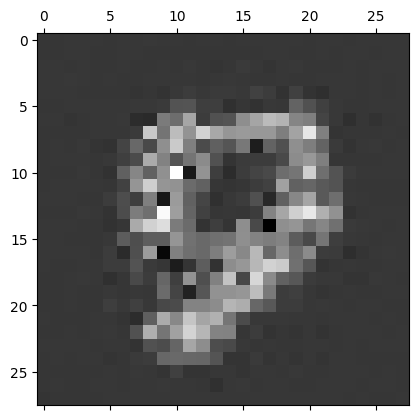

In [81]:
torch.manual_seed(0)
x_flow = flow.sample((100,))[:, 0].detach().cpu()

plt.matshow(x_flow[8], cmap='gray');